# Ömer Tuğrul CS464 HW1

# Question 3.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv("C:\\Users\\user\\Desktop\\CS464-HW1\\dataset\\X_train.csv",delim_whitespace = True)
X_test = pd.read_csv("C:\\Users\\user\\Desktop\\CS464-HW1\\dataset\\X_test.csv",delim_whitespace = True)

In [3]:
X_train.head(2)

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,Â£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Columns: 9635 entries, ad to flavour
dtypes: int64(9635)
memory usage: 122.6 MB


In [5]:
y_train = pd.read_csv("C:\\Users\\user\\Desktop\\CS464-HW1\\dataset\\y_train.csv",header=None)
y_test = pd.read_csv("C:\\Users\\user\\Desktop\\CS464-HW1\\dataset\\y_test.csv",header=None)
y_train
train_counts = y_train.value_counts().sort_index()

In [6]:
train_counts.index = ["Bussiness","Entertainment","Politics","Sport","Tech"]
train_counts

Bussiness        375
Entertainment    284
Politics         319
Sport            377
Tech             313
dtype: int64

In [7]:
pri_prob = train_counts/train_counts.sum()
pri_prob

Bussiness        0.224820
Entertainment    0.170264
Politics         0.191247
Sport            0.226019
Tech             0.187650
dtype: float64

In [8]:
test_counts = y_test.value_counts().sort_index()
test_counts.index = ["Bussiness","Entertainment","Politics","Sport","Tech"]
test_counts

Bussiness        135
Entertainment    102
Politics          98
Sport            134
Tech              88
dtype: int64

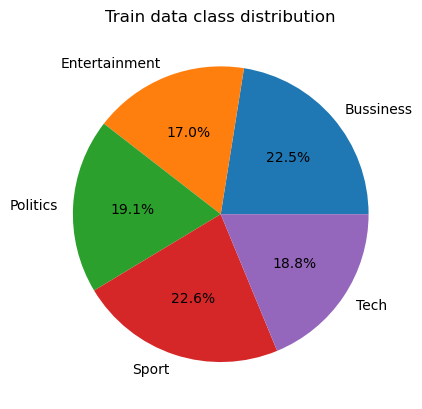

In [9]:
plt.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%');
plt.title("Train data class distribution");

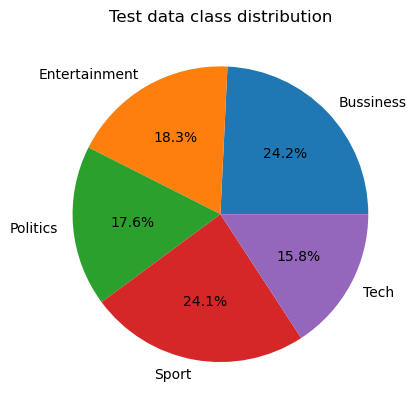

In [10]:
plt.pie(test_counts, labels=test_counts.index, autopct='%1.1f%%');
plt.title("Test data class distribution");

In [11]:
y_train.columns = ['class']

In [12]:
X_train[y_train['class'] == 4]['alien'].value_counts()

0    310
1      3
Name: alien, dtype: int64

In [13]:
X_train[y_train['class'] == 4]['alien'].sum()

3

In [14]:
X_train[y_train['class'] == 4]['thunder'].sum()

0

In [15]:
alien_freq = 0
for i in range(len(X_train[y_train['class'] == 4]['alien'].value_counts())):
    alien_freq += i*X_train[y_train['class'] == 4]['alien'].value_counts()[i]
total_tech = X_train[y_train['class'] == 4].sum().sum()
alien_given4 = alien_freq/total_tech
alien_given4

3.824920632896867e-05

In [16]:
X_train[y_train['class'] == 4]['thunder'].value_counts()

0    313
Name: thunder, dtype: int64

In [17]:
thunder_freq = 0
total = 0
for i in range(len(X_train[y_train['class'] == 4]['thunder'].value_counts())):
    alien_freq += i*X_train[y_train['class'] == 4]['thunder'].value_counts()[i]
    total += X_train[y_train['class'] == 4]['thunder'].value_counts()[i]
thunder_given4 = thunder_freq/total_tech
thunder_given4

0.0

In [18]:
#LOG ratio
log_alien_tech = np.log(alien_given4)
log_thunder_tech = np.log(thunder_given4)
log_alien_tech,log_thunder_tech

C:\Users\user\AppData\Local\Temp\ipykernel_66524\850315015.py:3: RuntimeWarning: divide by zero encountered in log
  log_thunder_tech = np.log(thunder_given4)


(-10.171387747476452, -inf)

In [19]:
total_class_values = {}
for i in range(5):
    total_class_values[i] = y_train.value_counts().sort_index()[i]

# Question 3.2

First I will write the accuracy function to evaluate the result of the functions

In [20]:
def calculate_accuracy(y_test, y_pred):
    y_test = np.array(y_test)
    y_prediction = np.array(y_pred)
    
    correct_values = np.sum(y_test==y_pred)
    accuracy = correct_values/len(y_test)

    return accuracy

In [21]:
total_class_values

{0: 375, 1: 284, 2: 319, 3: 377, 4: 313}

In [22]:
import datetime

start_time = datetime.datetime.now()

In [23]:
priorss = (y_train.value_counts().sort_index()/y_train.value_counts().sum())
prior_class_probs = {}
for i in range(5):
    prior_class_probs[i] = priorss[i]

In [24]:
prior_class_probs

{0: 0.22482014388489208,
 1: 0.17026378896882494,
 2: 0.19124700239808154,
 3: 0.2260191846522782,
 4: 0.18764988009592326}

In [25]:
type(X_train.columns.size)

int

In [26]:
(X_train[y_train['class'] == 4]['alien'].sum())/X_train[y_train['class'] == 4].sum().sum()

3.824920632896867e-05

In [27]:
prior_class_probs,total_class_values

({0: 0.22482014388489208,
  1: 0.17026378896882494,
  2: 0.19124700239808154,
  3: 0.2260191846522782,
  4: 0.18764988009592326},
 {0: 375, 1: 284, 2: 319, 3: 377, 4: 313})

In [28]:
dict_values = list(prior_class_probs.values())
prior_arr = np.array(dict_values)
prior_arr

array([0.22482014, 0.17026379, 0.191247  , 0.22601918, 0.18764988])

In [29]:
y_train.head(5)

,class
0,4
1,1
2,1
3,0
4,0


In [30]:
X_train.shape

(1668, 9635)

In [31]:
np.unique(y_train)

array([0, 1, 2, 3, 4], dtype=int64)

In [32]:
def MLE(X_train,y_train):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    m,n = X_train.shape
    classes = np.unique(y_train)
    n_classes = len(classes)
    
    likelihoods = np.zeros((n_classes,n))
    
    for c in range(n_classes):
        doc_count = 0
        word_count = np.zeros(n)
        for i in range(m):
            if y_train[i] == c:
                word_count += X_train[i]
                doc_count += np.sum(X_train[i])
        likelihoods[c,:] = np.log(word_count/doc_count)
        likelihoods[c, :] = np.where(likelihoods[c, :] == -np.inf, -1e12, likelihoods[c, :])
        
    return likelihoods

In [33]:
X_train[y_train['class'] == 2].sum(axis=0).sum()

71554

In [34]:
likelihoods = MLE(X_train,y_train)
likelihoods

C:\Users\user\AppData\Local\Temp\ipykernel_66524\3523928532.py:17: RuntimeWarning: divide by zero encountered in log
  likelihoods[c,:] = np.log(word_count/doc_count)


array([[-6.23658874e+00, -5.41592824e+00, -6.59899436e+00, ...,
        -1.00000000e+12, -1.00000000e+12, -1.00000000e+12],
       [-6.30182779e+00, -6.22528771e+00, -8.29425795e+00, ...,
        -1.00000000e+12, -1.00000000e+12, -1.00000000e+12],
       [-6.22238063e+00, -9.09876615e+00, -7.65184716e+00, ...,
        -1.00000000e+12, -1.00000000e+12, -1.00000000e+12],
       [-5.98569955e+00, -7.51558483e+00, -8.26935664e+00, ...,
        -1.00000000e+12, -1.00000000e+12, -1.00000000e+12],
       [-6.49087654e+00, -6.75914053e+00, -8.43678669e+00, ...,
        -9.88370568e+00, -1.01713877e+01, -1.05768529e+01]])

In [35]:
y_test.shape

(557, 1)

In [36]:
def multinomial_nb(X_test, likelihoods, priors, classes):
    X_test = X_test.to_numpy()
    
    n_samples = X_test.shape[0]
    n_classes = len(classes)
    log_priors = np.log(priors)
    class_prob = np.zeros((n_samples, n_classes))
    
    for c in range(n_classes):
        class_prob[:, c] = X_test.dot(likelihoods[c, :]) + log_priors[c]
    
    predictions = np.argmax(class_prob, axis=1)
    return predictions

In [37]:
classes = np.unique(y_train)
y_pred1 = multinomial_nb(X_test, likelihoods, prior_arr, classes)
accuracy = calculate_accuracy(y_test[0],y_pred1)
print(f"Accuracy of the Multinomial Naive Bayes classifier: {accuracy:.3f}")

Accuracy of the Multinomial Naive Bayes classifier: 0.946


In [38]:
#CONTINUE TO NEXT QUESTION

# Question 3.3

In [39]:
def MLE_drichlet(X_train,y_train):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    m,n = X_train.shape
    classes = np.unique(y_train)
    n_classes = len(classes)
    
    likelihoods = np.zeros((n_classes,n))
    
    for c in range(n_classes):
        doc_count = n # I only add here total word count as drichlet prior
        word_count = np.zeros(n) + 1 # I add alpha = 1 prior to each word
        for i in range(m):
            if y_train[i] == c:
                word_count += X_train[i]
                doc_count += np.sum(X_train[i])
        likelihoods[c,:] = np.log(word_count/doc_count)
        likelihoods[c, :] = np.where(likelihoods[c, :] == -np.inf, -1e12, likelihoods[c, :])
        
    return likelihoods

In [40]:
likelihoods = MLE_drichlet(X_train,y_train)
classes = np.unique(y_train)
y_pred2 = multinomial_nb(X_test, likelihoods, prior_arr, classes)#Use the prediction function written in
accuracy = calculate_accuracy(y_test[0],y_pred2)
print(f"Accuracy of the Multinomial Naive Bayes classifier-with Laplace smoothing: {accuracy:.3f}")

Accuracy of the Multinomial Naive Bayes classifier-with Laplace smoothing: 0.977


# Question 3.4

In [41]:
#Preprocess dataset so that all positive numbers become 1 

In [42]:
X_train_processed = (X_train > 0).astype(int)
X_test_processed = (X_test > 0).astype(int)
X_train_processed

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,Â£339,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour
0,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1664,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1665,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1666,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
num_features = X_train.shape[1]
n_classes = len(classes)
n_classes,num_features

(5, 9635)

In [44]:
prior_arr

array([0.22482014, 0.17026379, 0.191247  , 0.22601918, 0.18764988])

In [45]:
#Now find likelihoods
likelihood_ber = np.zeros((n_classes, num_features))
for i in range(n_classes):
    X_class = X_train_processed[y_train['class'] == i]
    word_count = X_class.sum(axis=0)
    likelihood_ber[i] = (word_count + 1) / (X_class.shape[0] + 2)

In [46]:
likelihood_ber

array([[0.25464191, 0.29442971, 0.17241379, ..., 0.00265252, 0.00265252,
        0.00265252],
       [0.23076923, 0.16083916, 0.03496503, ..., 0.0034965 , 0.0034965 ,
        0.0034965 ],
       [0.33956386, 0.01869159, 0.07788162, ..., 0.00311526, 0.00311526,
        0.00311526],
       [0.31926121, 0.06068602, 0.04221636, ..., 0.00263852, 0.00263852,
        0.00263852],
       [0.28888889, 0.16190476, 0.05079365, ..., 0.01269841, 0.01269841,
        0.00952381]])

In [47]:
def BNB(X_test_processed, likelihood_ber, prior_arr, n_classes):
    predictions = []
    for doc in X_test_processed.values:
        class_scores = []
        for i in range(n_classes):
            log_like_1 = np.log(likelihood_ber[i])
            log_like_0 = np.log(1 - likelihood_ber[i])
            c_score = np.log(prior_arr[i]) + np.sum(doc * log_like_1) + np.sum((1 -doc) * log_like_0)
            if c_score == -np.inf:
                c_score = -1e12
            class_scores.append(c_score)

        predictions.append(np.argmax(class_scores))

    return predictions

In [48]:
y_pred_ber = BNB(X_test_processed,likelihood_ber,prior_arr,n_classes)

In [49]:
accuracy = calculate_accuracy(y_test[0],y_pred_ber)
print(f"Accuracy of the Multinomial Naive Bayes classifier: {accuracy:.3f}")

Accuracy of the Multinomial Naive Bayes classifier: 0.966


In [50]:
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f"Elapsed time to run all three algorithm is: {elapsed_time.total_seconds()}")
#This elapsed time contains the plots and data_processing time.

Elapsed time to run all three algorithm is: 2.175299
